# Gaussian Mixture Clustering

#### The Spark Python code demonstrates Gaussian Mixture Model (GMM) clustering using the pyspark.ml.clustering library. Here’s a concise description:

A Spark session is created with the application name “GMMClustering.”
Example data points are defined as dense vectors in the data list.
Model Creation:
A GMM model (gm) with 3 clusters is instantiated, specifying a tolerance (tol) and a random seed (seed).
The model is fitted to the example data (df).
Cluster Information:
The summary of the fitted model (summary) provides:
The number of clusters (summary.k).
Sizes of each cluster (summary.clusterSizes).
Model Parameters:
The model weights (weights) represent the mixture proportions for each cluster.
Gaussian parameters (gaussians) include mean and covariance for each cluster.
Predictions:
The model predicts cluster assignments for the example data, resulting in a new DataFrame (transformed).
The features and prediction columns are selected and displayed.

In [5]:
from pyspark.ml.clustering import GaussianMixture
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("GMMClustering").getOrCreate()

# Example data (you can replace this with your own dataset)
data = [
    (Vectors.dense([-0.1, -0.05]),),
    (Vectors.dense([-0.01, -0.1]),),
    (Vectors.dense([0.9, 0.8]),),
    (Vectors.dense([0.75, 0.935]),),
    (Vectors.dense([-0.83, -0.68]),),
    (Vectors.dense([-0.91, -0.76]),)
]
df = spark.createDataFrame(data, ["features"])

# Create a GaussianMixture model
gm = GaussianMixture(k=3, tol=0.0001, seed=10)

# Fit the model to the data
model = gm.fit(df)

# Get cluster information
summary = model.summary
print(f"Number of clusters: {summary.k}")
print(f"Cluster sizes: {summary.clusterSizes}")

# Access model parameters
weights = model.weights
gaussians = model.gaussians
for i, gaussian in enumerate(gaussians):
    print(f"Cluster {i} - Mean: {gaussian.mean}, Covariance: {gaussian.cov}")

# Make predictions
transformed = model.transform(df).select("features", "prediction")
transformed.show()



Number of clusters: 3
Cluster sizes: [3, 3, 0]
Cluster 0 - Mean: [0.5154545373476872,0.5606996559945743], Covariance: DenseMatrix([[0.19420665, 0.18593922],
             [0.18593922, 0.19126409]])
Cluster 1 - Mean: [-0.58449845480639,-0.5141739432769475], Covariance: DenseMatrix([[0.16509099, 0.11931755],
             [0.11931755, 0.08631804]])
Cluster 2 - Mean: [0.5042245452232562,0.5482587515522725], Covariance: DenseMatrix([[0.20615018, 0.19649977],
             [0.19649977, 0.20034504]])
+-------------+----------+
|     features|prediction|
+-------------+----------+
| [-0.1,-0.05]|         0|
| [-0.01,-0.1]|         1|
|    [0.9,0.8]|         0|
| [0.75,0.935]|         0|
|[-0.83,-0.68]|         1|
|[-0.91,-0.76]|         1|
+-------------+----------+



### Visualize the clusters in 2D space using the synthetic data 

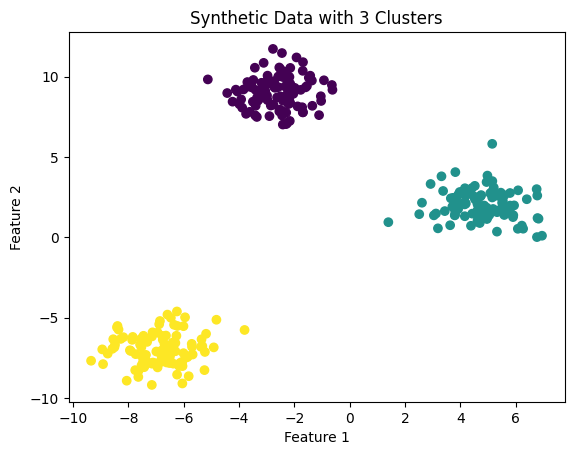

In [6]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data with 3 Clusters')
plt.show()

### Train the GMM model with 3 clusters using the synthetic data generated above
### Fit the model to the data and showing the predictions

In [7]:
from pyspark.ml.clustering import GaussianMixture
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("GMMClustering").getOrCreate()

# Example data (use your own dataset or the one generated above)
data = [(Vectors.dense(X[i]),) for i in range(len(X))]
df = spark.createDataFrame(data, ["features"])

# Create a GaussianMixture model
gm = GaussianMixture(k=3, tol=0.0001, seed=10)

# Fit the model to the data
model = gm.fit(df)

# Make predictions
transformed = model.transform(df).select("features", "prediction")

# Show the transformed data (features and predicted cluster)
transformed.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[-7.3389880906915...|         1|
|[-7.7400405564352...|         1|
|[-1.6866527109495...|         2|
|[4.42219763300088...|         0|
|[-8.9177517263291...|         1|
|[5.49753845943012...|         0|
|[-2.3360166972015...|         2|
|[5.05281029050372...|         0|
|[-2.9883718608980...|         2|
|[-3.7005011202553...|         2|
|[-3.1109042352821...|         2|
|[4.99689432219314...|         0|
|[-2.3003340280479...|         2|
|[-3.9245683651031...|         2|
|[-7.5302697602730...|         1|
|[-3.2112507169301...|         2|
|[-8.5071696290344...|         1|
|[2.61473624957049...|         0|
|[-2.4121200737047...|         2|
|[-1.9223405292524...|         2|
+--------------------+----------+
only showing top 20 rows



### Evaluate the model and plot the clusters

Silhouette Score: 0.9696628776463786


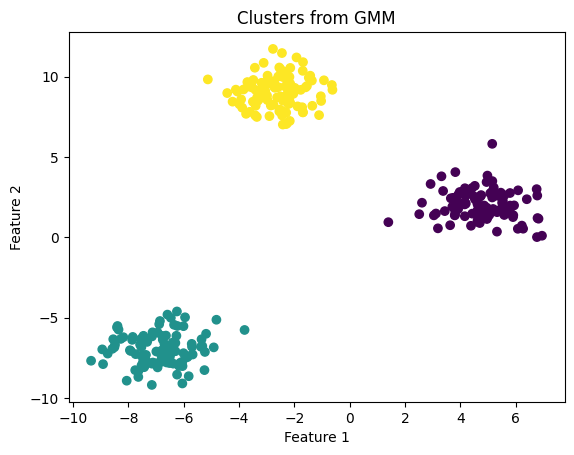

In [8]:
# Evaluate the model (you can choose other metrics as well)
# For example, silhouette score:
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(transformed)
print(f"Silhouette Score: {silhouette_score}")

# Plot the clusters (assuming 2D data)
transformed_pd = transformed.toPandas()
plt.scatter(transformed_pd["features"].apply(lambda x: x[0]), transformed_pd["features"].apply(lambda x: x[1]), c=transformed_pd["prediction"], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters from GMM')
plt.show()